In [4]:
import numpy as np
import h5py
import pandas as pd

In [6]:
#Reading matlab files and converting into numpy array
data = {}
targets = {}
files = open('files', 'r')
lines = files.readlines()
count = {}
for line in lines:
    fileName, target = line.strip().split(";")
    with h5py.File(fileName, 'r') as f:
        for k, v in f.items():
            tmp=np.array(v).transpose()
            if not target in data.keys():
                data[target]=tmp
                count[target] = tmp.shape[0]
            else:
                data[target] = np.concatenate((data[target], tmp))
                count[target]+= tmp.shape[0]
totalCount = 0
i=0
targetsColumn = None
for k, v in count.items():
    targets[k]=np.ones(v, dtype=int)*int(i)
    totalCount += v
    if i==0:
        targetsColumn = targets[k]
    else:
        targetsColumn = np.concatenate((targetsColumn, targets[k]))
    i += 1
targetsColumn=targetsColumn.reshape(targetsColumn.shape[0], 1)
dataSet = None
for k, v in data.items():
    if dataSet is None:
        dataSet = data[k]
    else:
        dataSet = np.concatenate((dataSet, data[k]))
dataSet = np.concatenate((dataSet, targetsColumn), axis=1)

In [8]:
df = pd.DataFrame(data=dataSet, columns=["Costal", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2", "Longitude", "Latitude", "Target"])
df

,Costal,Blue,Green,Red,NIR,SWIR1,SWIR2,Longitude,Latitude,Target
0,10856.0,9761.0,8767.0,7646.0,17400.0,11280.0,7453.0,-75.139976,0.609742,0.0
1,10883.0,9767.0,8845.0,7616.0,17759.0,10465.0,7143.0,-75.142268,0.614220,0.0
2,10893.0,9787.0,8797.0,7574.0,17908.0,10563.0,7026.0,-75.354861,0.635109,0.0
3,10844.0,9813.0,8808.0,7617.0,17533.0,10779.0,7173.0,-75.130945,0.639055,0.0
4,10945.0,9848.0,9001.0,7699.0,21179.0,12428.0,7952.0,-75.300805,0.660083,0.0
...,...,...,...,...,...,...,...,...,...,...
44076,10053.0,9231.0,8983.0,8140.0,21430.0,13972.0,9350.0,-76.357971,3.289182,2.0
44077,9465.0,8638.0,8662.0,8334.0,21553.0,12664.0,7129.0,-76.355002,3.289864,2.0
44078,10026.0,9285.0,9514.0,8931.0,21104.0,14579.0,8932.0,-76.354462,3.290000,2.0
44079,10004.0,9281.0,9451.0,8706.0,23822.0,16861.0,9970.0,-76.437893,3.298023,2.0


In [9]:
from sklearn.preprocessing import StandardScaler
features = ["Costal", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]
x=df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
finalDf['Target'] = finalDf['Target'].replace({0:"coca", 1:"nubes", 2:"cana"})
finalDf

,PC1,PC2,Target
0,-1.582644,-0.610175,coca
1,-1.633047,-0.912684,coca
2,-1.639262,-0.900610,coca
3,-1.627890,-0.808588,coca
4,-1.310243,-0.221125,coca
...,...,...,...
44076,-1.109507,0.474253,cana
44077,-1.462238,-0.247047,cana
44078,-1.106821,0.591631,cana
44079,-0.795635,1.428863,cana


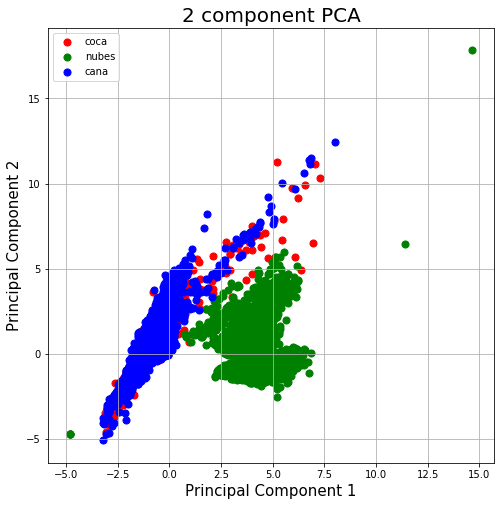

In [12]:
from matplotlib import pyplot as plt


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['coca', 'nubes', 'cana']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()